In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("maliciousornot.xlsx")

In [3]:
#checking the columns is there any object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Type                       548 non-null    int64  
 1   URL_LENGTH                 548 non-null    float64
 2   NUMBER_SPECIAL_CHARACTERS  548 non-null    float64
 3   TCP_CONVERSATION_EXCHANGE  548 non-null    float64
 4   DIST_REMOTE_TCP_PORT       548 non-null    float64
 5   REMOTE_IPS                 548 non-null    float64
 6   APP_BYTES                  548 non-null    float64
 7   SOURCE_APP_PACKETS         548 non-null    float64
 8   REMOTE_APP_PACKETS         548 non-null    float64
 9   SOURCE_APP_BYTES           548 non-null    float64
 10  REMOTE_APP_BYTES           548 non-null    float64
 11  APP_PACKETS                548 non-null    float64
 12  DNS_QUERY_TIMES            548 non-null    float64
 13  SOURCE_A                   548 non-null    float64

In [4]:
#checked is there any NaN cell
df.isnull().sum().sum()

np.int64(0)

<Axes: >

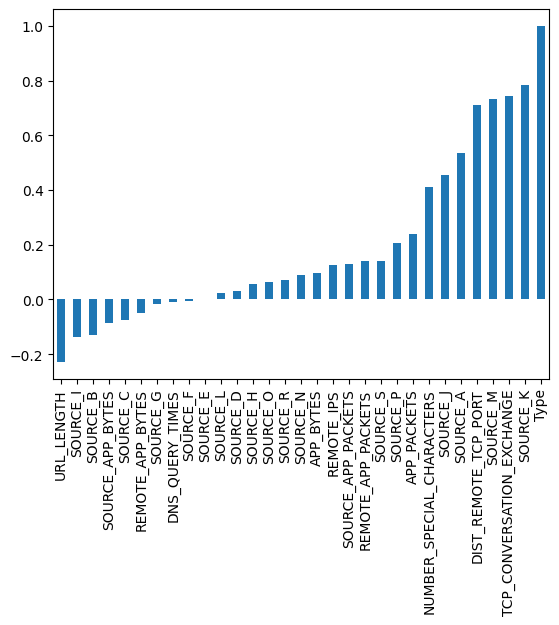

In [5]:
#monitoring correlation between columns
df.corr()["Type"].sort_values().plot(kind="bar")

In [6]:
#we can understand %38 of site's is harmfull from mean of the "Type" column
df.describe()

,Type,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,...,SOURCE_I,SOURCE_J,SOURCE_K,SOURCE_M,SOURCE_L,SOURCE_N,SOURCE_O,SOURCE_P,SOURCE_R,SOURCE_S
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,...,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,0.383212,949.973475,25.015747,119.725438,857.123249,5.785481,6.499737,10.069604,3.181365,22.809689,...,399.714125,33.295952,139.830855,1155.666380,14.295530,32.855845,34.913670,11.758580,40.829159,2.637820
std,0.486613,3202.802599,5.605685,31.842845,461.579998,27.796268,35.390031,46.976527,21.315640,70.942060,...,2117.405314,7.956699,44.017609,746.777340,49.075477,126.026487,149.880701,52.045464,119.531119,19.086225
min,0.000000,10.051787,12.577687,56.722647,185.880333,0.068173,0.025104,0.000000,0.000000,0.151165,...,10.271993,15.569907,65.297753,239.895733,0.105246,0.044456,0.000000,0.000000,0.202720,0.071295
25%,0.000000,15.838688,20.987638,97.470595,544.622900,0.112309,0.084718,0.038394,0.026383,0.211755,...,17.082208,27.325057,108.999062,667.971017,0.154501,0.196275,0.152558,0.084805,0.331022,0.093099
50%,0.000000,18.069900,24.423510,112.920683,723.637967,0.125084,0.122720,0.085395,0.045304,0.235168,...,19.838030,32.972710,127.117537,901.616767,0.173899,0.297149,0.328950,0.132318,0.374869,0.103743
75%,1.000000,23.264187,28.270650,137.175800,1037.270550,0.137694,0.172215,0.189799,0.101201,0.266159,...,25.919620,38.698083,164.636867,1460.488333,0.194689,0.497797,0.559098,0.223866,0.430342,0.119375
max,1.000000,12828.981333,50.880693,244.170333,3239.628667,159.326000,358.807333,405.439333,209.844000,393.781333,...,12928.722000,64.170813,325.387733,5510.348000,239.636667,1370.462667,1621.757333,376.942000,704.661333,224.092667


<Axes: xlabel='Type', ylabel='count'>

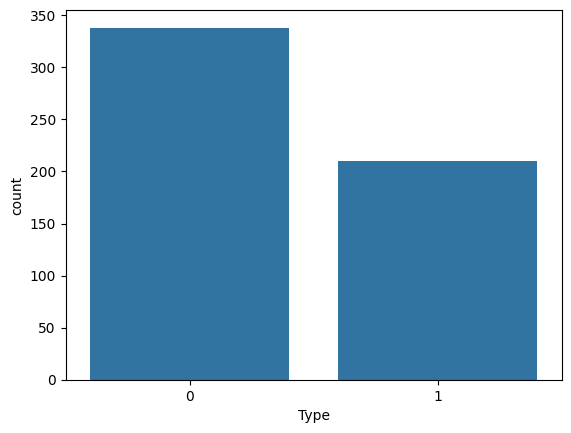

In [7]:
#visualize above cell
sns.countplot(x="Type",data=df)

In [8]:
y=df["Type"]
x=df.drop(["Type"],axis=1)

x=x.values if hasattr(x,"values") else x
y=y.values if hasattr(y,"values") else y


In [9]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=44)

x_train=x_train.values if hasattr(x_train,"values") else x_train
x_test=x_test.values if hasattr(x_test,"values") else x_test


In [10]:
print(x_train.shape)

(383, 30)


In [11]:
print(y_train.shape)

(383,)


In [12]:
print(x_test.shape)

(165, 30)


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [14]:
x_train

array([[3.62779989e-04, 4.64361929e-01, 2.00475159e-01, ...,
        2.84467354e-04, 2.24068418e-04, 1.91448381e-04],
       [4.92489036e-04, 2.88945796e-01, 2.57354483e-01, ...,
        3.38522337e-04, 7.00099631e-01, 1.04599855e-04],
       [4.76275405e-04, 4.05889885e-01, 2.56026833e-01, ...,
        2.62027491e-04, 1.93221523e-04, 1.29694569e-04],
       ...,
       [3.89127139e-04, 1.04993598e-01, 2.13472154e-01, ...,
        2.90343643e-04, 2.11858189e-04, 1.87053915e-04],
       [8.81616175e-04, 4.15279556e-01, 4.57759765e-01, ...,
        6.99312715e-04, 2.72266692e-04, 2.31172041e-04],
       [3.25285968e-04, 2.91079812e-01, 1.95234435e-01, ...,
        5.34364261e-04, 5.43723010e-01, 2.31923725e-04]])

In [15]:
#checking the scaled values
print("MIN x_train value: "+str(x_train.min()))
print("MAX x_train value: "+str(x_train.max()))
#checking the scaled values
print("MIN x_test value: "+str(x_test.min()))
print("MAX x_test value: "+str(x_test.max()))

MIN x_train value: 0.0
MAX x_train value: 1.0000000000000002
MIN x_test value: -0.028595817328211703
MAX x_test value: 1.3774863282195229


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
model=Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [18]:
model.fit(x=x_train,y=y_train,epochs=400,validation_data=(x_test,y_test),verbose=1)

Epoch 1/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6836 - val_loss: 0.6690
Epoch 2/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6677 - val_loss: 0.6483
Epoch 3/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6449 - val_loss: 0.6221
Epoch 4/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6147 - val_loss: 0.5918
Epoch 5/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5930 - val_loss: 0.5566
Epoch 6/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5561 - val_loss: 0.5157
Epoch 7/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5053 - val_loss: 0.4698
Epoch 8/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4717 - val_loss: 0.4243
Epoch 9/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4228 - val_loss: 0.3798
Epoch 10/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3591 - val_loss: 0.3414
Epoch 11/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2974 - val_loss: 0.3103
Epoch 12/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2

In [19]:
lossDf=pd.DataFrame(model.history.history)

<Axes: >

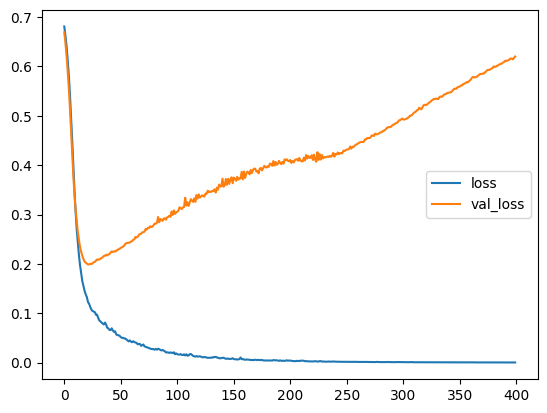

In [20]:
lossDf.plot()

# As we can see overfitting occured, so let's add early stopping mechanism to our model

In [21]:
model=Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=15,activation="relu"))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [22]:
earlyStopping=EarlyStopping(monitor="val_loss",patience=25,mode="min",verbose=1)

In [23]:
model.fit(x=x_train,y=y_train,epochs=400,validation_data=(x_test,y_test),callbacks=[earlyStopping],verbose=1)

Epoch 1/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6946 - val_loss: 0.6881
Epoch 2/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6760 - val_loss: 0.6701
Epoch 3/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6606 - val_loss: 0.6510
Epoch 4/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6436 - val_loss: 0.6294
Epoch 5/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6209 - val_loss: 0.6062
Epoch 6/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5898 - val_loss: 0.5825
Epoch 7/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5672 - val_loss: 0.5585
Epoch 8/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5358 - val_loss: 0.5366
Epoch 9/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5159 - val_loss: 0.5138
Epoch 10/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4862 - val_loss: 0.4922
Epoch 11/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4561 - val_loss: 0.4688
Epoch 12/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4

In [24]:
lossDf2=pd.DataFrame(model.history.history)

<Axes: >

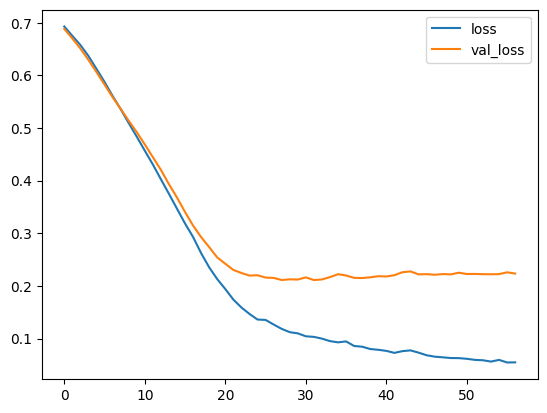

In [25]:
lossDf2.plot()

In [26]:
from sklearn.metrics import accuracy_score

predictArr=(model.predict(x_test) > 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [27]:
print(type(predictArr))

<class 'numpy.ndarray'>


In [28]:
predictDf=pd.DataFrame(np.column_stack((y_test,predictArr)),columns=["Real Value","Model Predict"])

In [29]:
print(predictDf)

     Real Value  Model Predict
0             0              1
1             0              0
2             0              0
3             0              0
4             0              0
..          ...            ...
160           0              0
161           0              0
162           0              0
163           0              0
164           1              1

[165 rows x 2 columns]


## Dropout

In [30]:
model=Sequential()

model.add(Dense(units=30,activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(units=15,activation="relu"))
model.add(Dropout(0.6))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

In [31]:
model.fit(x=x_train,y=y_train,epochs=400,validation_data=(x_test,y_test),callbacks=[earlyStopping],verbose=1)

Epoch 1/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7479 - val_loss: 0.6955
Epoch 2/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7237 - val_loss: 0.6940
Epoch 3/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6693 - val_loss: 0.6909
Epoch 4/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7382 - val_loss: 0.6885
Epoch 5/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7000 - val_loss: 0.6855
Epoch 6/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6894 - val_loss: 0.6817
Epoch 7/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6827 - val_loss: 0.6775
Epoch 8/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6969 - val_loss: 0.6734
Epoch 9/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6848 - val_loss: 0.6695
Epoch 10/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7005 - val_loss: 0.6661
Epoch 11/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6782 - val_loss: 0.6618
Epoch 12/400
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6

In [32]:
lossDf3=pd.DataFrame(model.history.history)

<Axes: >

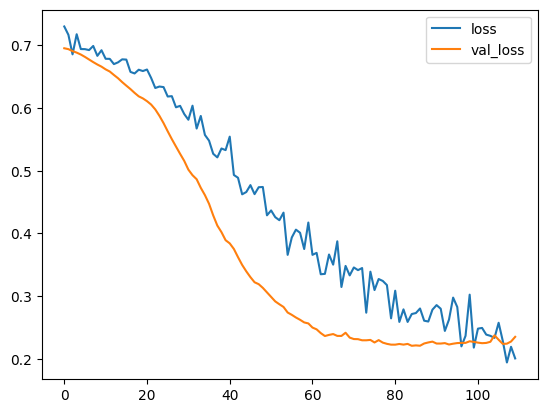

In [33]:
lossDf3.plot()

In [34]:
predictArr2=(model.predict(x_test) > 0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [35]:
predictArr2

array([[1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [36]:
accuracy_score(y_test,predictArr2)

0.9151515151515152

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictArr2))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       106
           1       0.88      0.88      0.88        59

    accuracy                           0.92       165
   macro avg       0.91      0.91      0.91       165
weighted avg       0.92      0.92      0.92       165



In [38]:
print(confusion_matrix(y_test,predictArr2))

[[99  7]
 [ 7 52]]


as you can see above, we predicted 99 correct and only 7 arw false